# Find roots of $\Delta(\lambda)$ (an exponential polynomial)

## Idea #1: Separate real and imaginary parts

 1. Write $\lambda=x+iy$ and thus $\Delta(\lambda) = f(x,y) + ig(x,y)$ for real-valued $f, g: \mathbb{R}^2\to \mathbb{R}$.
 2. Solve $f(x,y)=0$ and $g(x,y)=0$ separately as $f_0:=\{(x,y)\in\mathbb{R}^2\mid f(x,y)=0\}$, $g_0:=\{(x,y)\in\mathbb{R}^2\mid g(x,y)=0\}$ and find the zero set of $\Delta(\lambda)$ as $f_0\cap g_0$.

Consider the example
\begin{align*}
    \Delta(\lambda) &= \cos(\lambda)\\
    &= \frac{1}{2}e^{i\lambda} + \frac{1}{2}e^{-i\lambda}\\
    &= \frac{1}{2}e^{i(x+iy)} + \frac{1}{2}e^{-i(x+iy)} \\
    &= \frac{1}{2}(e^{-y}e^{ix} + e^ye^{-ix})\\
    &= \frac{1}{2}e^{-y}(\cos(x) + i\sin(x)) + \frac{1}{2}e^y(\cos(x) - i\sin(x))\\ 
    &= \cos(x)\cosh(y) - i\sin(x)\sinh(y)
\end{align*}

### 1. Use SymPy to collect terms

Substitute $\lambda$ with $x+iy$ and separate the resulting equation into real and imaginary parts.

In [1]:
using SymPy

In [63]:
# function to separate real and imaginary parts of an expression delta(lambda)
# need to write symbolic versions of M
function separate_real_imaginary(delta)
    # check if delta has one free symbol that is lambda
    if length(free_symbols(delta)) == 1
        # declare x, y as real variables
        x = symbols("x", real = true)
        y = symbols("y", real = true)
        # substitute lambda as x+iy
        expr = subs(delta, lambda, x+im*y)
        # Split the new expression into summands, if any
        summands = args(expr)
        if length(summands) == 1
            summands = [expr]
        end
        println(summands)
        # For each summand, further split into factors
        sumSeparated = 0
        for summand in summands
            (constant, factors) = factor_list(summand)
            println(factors)
            # Initialize separated summand as the constant coefficient
            summandSeparated = constant
            for (factor, power) in factors
                factor = factor^power
                summandSeparated = summandSeparated * (real(factor) + im*imag(factor))
            end
            sumSeparated = sumSeparated + summandSeparated
        end
        real(sumSeparated) + im*imag(sumSeparated)
    end
end

separate_real_imaginary (generic function with 1 method)

In [60]:
lambda = symbols("lambda")
delta = cos(lambda)*e^lambda + sin(lambda)
delta = cos(lambda)
delta

cos(lambda)

In [67]:
deltaSeparated = separate_real_imaginary(delta)

SymPy.Sym[cos(x + I*y)]
Tuple{SymPy.Sym,Int64}[(cos(x + I*y), 1)]


-I*sin(x)*sinh(y) + cos(x)*cosh(y)

In [62]:
args(cos(lambda))

(lambda,)

### 2. Plot implicit curves $f(x,y) = 0$, $g(x,y)=0$ and find their intersections

In [ ]:
# for xVal in -10:0.01:10
#     for yVal in -10:0.01:10
#         realVal = subs(real(expr), (x, xVal), (y, yVal))
#         imagVal = subs(imag(expr), (x, xVal), (y, yVal))
#         if isapprox(realVal,0) & isapprox(imagVal,0)
#             println(realVal + im*imagVal)
#         end
#     end
# end

In [65]:
using Plots
using PyPlot

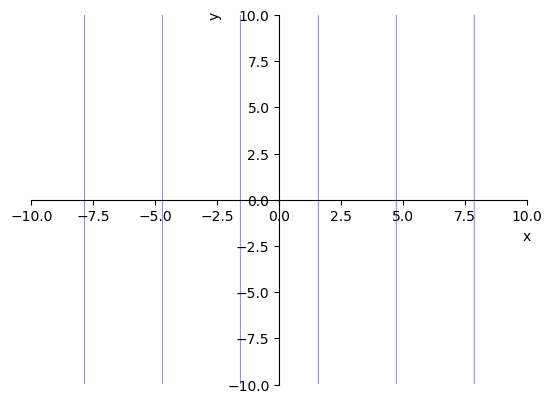

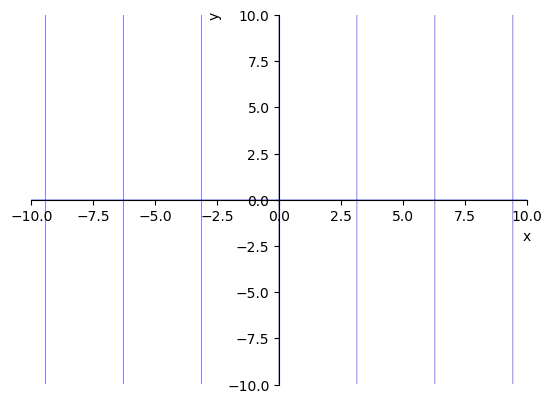

PyObject <sympy.plotting.plot.Plot object at 0x00000000047C2160>

In [68]:
# https://github.com/JuliaPy/SymPy.jl/blob/master/examples/tutorial.md
curve1 = plot_implicit(Eq(real(deltaSeparated), 0), (x, -10, 10), (y, -10, 10))
curve2 = plot_implicit(Eq(imag(deltaSeparated), 0), (x, -10, 10), (y, -10, 10))

In [75]:
using PyCall
print(keys(curve1))

Symbol[:__class__, :__delattr__, :__delitem__, :__dict__, :__dir__, :__doc__, :__eq__, :__format__, :__ge__, :__getattribute__, :__getitem__, :__gt__, :__hash__, :__init__, :__init_subclass__, :__le__, :__lt__, :__module__, :__ne__, :__new__, :__reduce__, :__reduce_ex__, :__repr__, :__setattr__, :__setitem__, :__sizeof__, :__str__, :__subclasshook__, :__weakref__, :_backend, :_series, :append, :aspect_ratio, :autoscale, :axis, :axis_center, :backend, :extend, :legend, :margin, :save, :show, :title, :xlabel, :xlim, :xscale, :ylabel, :ylim, :yscale]

In [76]:
curve1[:__doc__]

"The central class of the plotting module.\n\n    For interactive work the function ``plot`` is better suited.\n\n    This class permits the plotting of sympy expressions using numerous\n    backends (matplotlib, textplot, the old pyglet module for sympy, Google\n    charts api, etc).\n\n    The figure can contain an arbitrary number of plots of sympy expressions,\n    lists of coordinates of points, etc. Plot has a private attribute _series that\n    contains all data series to be plotted (expressions for lines or surfaces,\n    lists of points, etc (all subclasses of BaseSeries)). Those data series are\n    instances of classes not imported by ``from sympy import *``.\n\n    The customization of the figure is on two levels. Global options that\n    concern the figure as a whole (eg title, xlabel, scale, etc) and\n    per-data series options (eg name) and aesthetics (eg. color, point shape,\n    line type, etc.).\n\n    The difference between options and aesthetics is that an aestheti

In [77]:
# print(curve1[:__dir__]())
print(keys(curve1[:__dict__]["_series"][1]))

Symbol[:__class__, :__delattr__, :__dict__, :__dir__, :__doc__, :__eq__, :__format__, :__ge__, :__getattribute__, :__gt__, :__hash__, :__init__, :__init_subclass__, :__le__, :__lt__, :__module__, :__ne__, :__new__, :__reduce__, :__reduce_ex__, :__repr__, :__setattr__, :__sizeof__, :__str__, :__subclasshook__, :__weakref__, :_get_meshes_grid, :_get_raster_interval, :depth, :end_x, :end_y, :expr, :get_points, :get_raster, :has_equality, :is_2Dline, :is_3D, :is_3Dline, :is_3Dsurface, :is_contour, :is_implicit, :is_line, :is_parametric, :line_color, :nb_of_points, :start_x, :start_y, :use_interval_math, :var_x, :var_y]

In [79]:
getPoints = curve1[:__dict__]["_series"][1][:get_points]()
unique(getPoints[1])

651-element Array{PyCall.PyObject,1}:
 PyObject interval(-7.871093, -7.851561)
 PyObject interval(-4.726554, -4.707023)
 PyObject interval(-1.582041, -1.562511)
 PyObject interval(1.562515, 1.582046)  
 PyObject interval(4.707030, 4.726562)  
 PyObject interval(7.851562, 7.871093)  
 PyObject interval(-9.999988, -9.980457)
 PyObject interval(-9.980457, -9.960926)
 PyObject interval(-9.960926, -9.941395)
 PyObject interval(-9.921864, -9.902333)
 PyObject interval(-9.843740, -9.824209)
 PyObject interval(-9.824209, -9.804678)
 PyObject interval(-9.804678, -9.785147)
 ⋮                                      
 PyObject interval(-5.468740, -5.449208)
 PyObject interval(-5.429677, -5.410145)
 PyObject interval(-5.371082, -5.351551)
 PyObject interval(-5.214830, -5.195298)
 PyObject interval(-5.156235, -5.136704)
 PyObject interval(-5.136704, -5.117172)
 PyObject interval(-5.097641, -5.078109)
 PyObject interval(-5.039046, -5.019515)
 PyObject interval(-4.785142, -4.765611)
 PyObject interval(

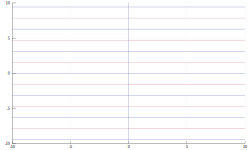

In [81]:
# https://github.com/JuliaPlots/Plots.jl/issues/273
Plots.contour(-10:0.01:10, -10:0.01:10, real(deltaSeparated), levels=[0], size = (1000, 600), tickfontsize = 10, seriescolor=:reds)
Plots.contour!(-10:0.01:10, -10:0.01:10, imag(deltaSeparated), levels=[0], size = (1000, 600), tickfontsize = 10, seriescolor=:blues)

In [82]:
curve3 = Plots.contour(-10:0.01:10, -10:0.01:10, real(deltaSeparated), levels=[0], size = (1000, 600), tickfontsize = 10, seriescolor=:reds)
print(fieldnames(curve3))

Symbol[:backend, :n, :attr, :user_attr, :series_list, :o, :subplots, :spmap, :layout, :inset_subplots, :init]

In [88]:
# print(fieldnames(curve3.subplots[1].series_list[1].d))
print(keys(curve3.subplots[1].series_list[1].d))
# curve3.subplots[1].series_list[1].d[:levels]
# print(fieldnames(curve3.subplots[1].series_list[1][:z]))
unique(curve3.subplots[1].series_list[1][:z].surf)

Symbol[:plot_object, :group, :stride, :marker_z, :markerstrokealpha, :markeralpha, :seriesalpha, :seriescolor, :smooth, :y, :linealpha, :linecolor, :arrow, :normalize, :linestyle, :contours, :fillcolor, :bar_width, :z, :bins, :markerstrokestyle, :weights, :linewidth, :fill_z, :markershape, :fillalpha, :markerstrokewidth, :xerror, :bar_position, :contour_labels, :hover, :primary, :x, :yerror, :ribbon, :subplot, :label, :line_z, :orientation, :markersize, :bar_edges, :seriestype, :quiver, :match_dimensions, :markerstrokecolor, :fillrange, :series_plotindex, :markercolor, :series_annotations, :levels]

1002001-element Array{Float64,1}:
 -9240.89    
 -9300.34    
 -9358.86    
 -9416.45    
 -9473.09    
 -9528.79    
 -9583.53    
 -9637.32    
 -9690.14    
 -9741.99    
 -9792.87    
 -9842.77    
 -9891.68    
     ⋮       
     0.993956
     0.995004
     0.995953
     0.996802
     0.997551
     0.998201
     0.99875 
     0.9992  
     0.99955 
     0.9998  
     0.99995 
     1.0     

In [84]:
fieldnames(curve3)

11-element Array{Symbol,1}:
 :backend       
 :n             
 :attr          
 :user_attr     
 :series_list   
 :o             
 :subplots      
 :spmap         
 :layout        
 :inset_subplots
 :init          

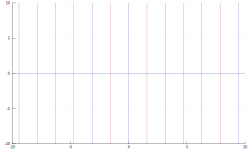

In [89]:
# https://stackoverflow.com/questions/50907491/how-to-overlay-contour-plots-in-julia-using-plots-with-pyplot-backend
# zeros (x,y) of the real part, cos(x)cosh(y)
Plots.contour(-10:0.01:10, -10:0.01:10, (x,y) -> cos(x)cosh(y), levels=[0], size = (1000, 600), tickfontsize = 10, seriescolor=:reds)
# zeros (x,y) of the imaginary part, sin(x)sinh(y)
Plots.contour!(-10:0.01:10, -10:0.01:10, (x,y) -> sin(x)sinh(y), levels=[0], size = (1000, 600), tickfontsize = 10, seriescolor=:blues)

Thus, zeros of $\Delta(\lambda)$ are points $(x,y)$ where the red and blue curves intersect, e.g., $(\frac{\pi}{2} + k\pi,0)$, $k\in\mathbb{Z}$.

In [ ]:
# https://discourse.julialang.org/t/implicit-plot-with-plots/6585/8
# https://nbviewer.jupyter.org/github/jverzani/ImplicitEquations.jl/blob/master/docs/examples.ipynb
using ImplicitEquations, Plots
f(x,y) = cos(x)cosh(y)
plot(f ⩵ 0)
g(x,y) = sin(x)sinh(y)
plot!(g ⩵ 0) # The zeros at x = 0 is missing

## Idea #2: Find discontinuities of $\sin(\arg(\Delta(\lambda)))$ as a function of $x, y$

Idea: Use `ChebFun` or `ApproxFun` to approximate the function with Chebyshev polynomials. If the function has discontinuities, the approximation would detect it and respond by producing a piecewise approximation. The locations of the discontinuities can be extracted from some internal function that displays the structure of the approximation.

In [ ]:
# https://scicomp.stackexchange.com/questions/2086/what-is-the-best-way-to-find-discontinuities-of-a-black-box-function
# http://www.chebfun.org/docs/guide/guide01.html
# http://www.chebfun.org/examples/approx/NoisyNonsmooth.html
# https://github.com/JuliaApproximation/ApproxFun.jl/issues/273

## Idea #3: Move around the contour plot of $\sin(\arg(\lambda))$